In [147]:
import pandas as pd
import pandas_profiling

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#データ読み込み
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample= pd.read_csv("data/sample_submit.csv",header = None)

In [148]:
df = pd.concat([train, test], sort=False)

In [149]:
train.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2492.964667,3.557000,113.733667,68.743667,11.164000,11.663333,35.262073,0.400476,28.932000,0.239000
std,1447.218078,3.032131,20.885612,16.332755,14.351159,45.064090,7.568025,0.274666,8.469078,0.426544
min,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000775,0.145844,21.000000,0.000000
25%,1218.750000,1.000000,100.000000,64.000000,0.000000,0.000000,32.301920,0.230987,22.000000,0.000000
50%,2465.500000,3.000000,111.000000,70.000000,0.000000,0.000000,33.835873,0.268674,26.000000,0.000000
75%,3750.250000,6.000000,125.000000,78.000000,24.000000,0.000000,39.578256,0.506778,33.000000,0.000000
max,4999.000000,13.000000,196.000000,110.000000,49.000000,579.000000,53.400629,2.302072,67.000000,1.000000


0 index int インデックスとして使用
1 Pregnancies int 妊娠した回数
2 Glucose int 経口ブドウ糖負荷試験における2時間の血漿ブドウ糖濃度
3 BloodPressure int 拡張期血圧
4 SkinThickness int 皮膚のひだの厚さ
5 Insulin int 血清インスリン
6 BMI float BMI
7 Age int 年齢
8 DiabetesPedigreeFunction float 糖尿病血統（家族歴に基づいて糖尿病にかかる可能性をスコアリングした数値）
9 Outcome int 糖尿病であるか（糖尿病の場合1、でない場合0）

In [150]:
train.shape

(3000, 10)

In [151]:
test.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,398,0,126,80,0,0,40.096264,0.822517,21
1,3833,3,88,60,20,0,39.810590,0.204331,22
2,4836,3,114,76,0,0,33.198760,0.521011,21
3,4572,1,146,74,0,0,26.890259,0.504950,38
4,636,1,123,90,26,140,40.270088,0.800513,28


欠損値は無く、カテゴリカル変数も無し

In [152]:
# train.profile_report()

Pregnancies　妊娠した回数が13回？　層化した方がいいか？
Glucose　ブドウ濃度　正規分布に近い　そのまま利用
BloodPressure　正規分布に近い　０のデータを確認　０はmeanに置き換えか？
SkinThickness　一様分布に近い　０のデータを確認　０は中央値に置き換えか？
Insulin　インスリン　1.7～10.4　値が低い検体は全部０にしてあるのか？
BMI　正規分布に近い　０のデータを確認　０はmeanに置き換えか？
DiabetesPedigreeFunction　糖尿病血統スコア　このままつかえるか

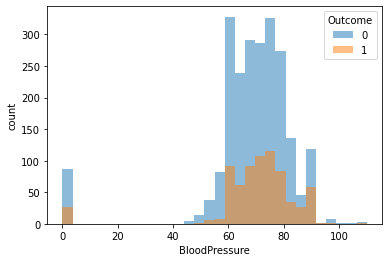

In [153]:
#　血圧との関係
plt.hist(train.loc[train['Outcome'] == 0, 'BloodPressure'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'BloodPressure'].dropna(),
         bins=30, alpha=0.5, label='1')
plt.xlabel('BloodPressure')
plt.ylabel('count')
plt.legend(title='Outcome')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3000 non-null   int64  
 1   Pregnancies               3000 non-null   int64  
 2   Glucose                   3000 non-null   int64  
 3   BloodPressure             3000 non-null   int64  
 4   SkinThickness             3000 non-null   int64  
 5   Insulin                   3000 non-null   int64  
 6   BMI                       3000 non-null   float64
 7   DiabetesPedigreeFunction  3000 non-null   float64
 8   Age                       3000 non-null   int64  
 9   Outcome                   3000 non-null   int64  
 10  BloodPressure_new         2887 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 257.9 KB
70.97859744990893
72.88277858176556
71.43436092829927
87
26


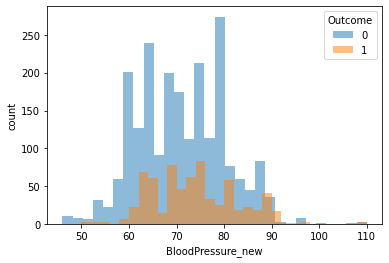

In [154]:
train['BloodPressure_new'] = train['BloodPressure'].replace([0], np.nan)
plt.hist(train.loc[train['Outcome'] == 0, 'BloodPressure_new'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'BloodPressure_new'].dropna(),
         bins=30, alpha=0.5, label='1')
plt.xlabel('BloodPressure_new')
plt.ylabel('count')
plt.legend(title='Outcome')

train.info()
BPmean_0= train.loc[train['Outcome'] == 0, 'BloodPressure_new'].mean()
print(BPmean_0)
BPmean_1= train.loc[train['Outcome'] == 1, 'BloodPressure_new'].mean()
print(BPmean_1)
BPmean= train['BloodPressure_new'].mean()
print(BPmean)

print(train[train['Outcome']==0]['BloodPressure_new'].isnull().sum(axis=0))
print(train[train['Outcome']==1]['BloodPressure_new'].isnull().sum(axis=0))

血圧0は欠損、欠損かどうかの特徴量作成(0なら1、取得された値があれば1)

In [155]:
train['BloodPressure_na'] = train['BloodPressure_new'].isnull()*1
train

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_new,BloodPressure_na
0,200,9,125,74,0,0,28.536910,0.444902,45,1,74.0,0
1,3832,4,109,80,0,0,28.047673,0.238243,22,0,80.0,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0,78.0,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0,74.0,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4931,4,88,74,17,0,33.848723,0.171073,23,0,74.0,0
2996,3264,0,144,88,0,0,26.846832,0.259957,21,1,88.0,0
2997,1653,6,117,96,36,0,28.101646,0.716126,22,1,96.0,0
2998,2607,2,113,74,0,0,33.079021,0.266179,38,1,74.0,0


× 欠損値（血圧０は）平均値に置き換え
他の要素と相関あればまた考える

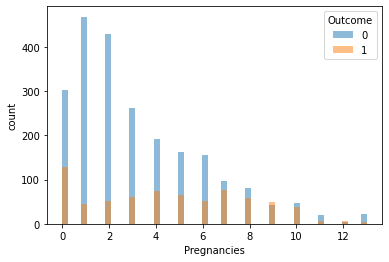

In [156]:
#　妊娠との関係
plt.hist(train.loc[train['Outcome'] == 0, 'Pregnancies'].dropna(),
         bins=50, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'Pregnancies'].dropna(),
         bins=50, alpha=0.5, label='1')
plt.xlabel('Pregnancies')
plt.ylabel('count')
plt.legend(title='Outcome')

binning

In [157]:
train['Pregancies_bin'] = pd.cut(train['Pregnancies'],
                                 bins=[0, 0.1, 3, 6, 20],
                                 right=False,
                                 labels=[0,3,6, 20],
                                 duplicates='raise',
                                 include_lowest=True)
train['Pregancies_bin'] = train['Pregancies_bin'].astype(np.int64)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3000 non-null   int64  
 1   Pregnancies               3000 non-null   int64  
 2   Glucose                   3000 non-null   int64  
 3   BloodPressure             3000 non-null   int64  
 4   SkinThickness             3000 non-null   int64  
 5   Insulin                   3000 non-null   int64  
 6   BMI                       3000 non-null   float64
 7   DiabetesPedigreeFunction  3000 non-null   float64
 8   Age                       3000 non-null   int64  
 9   Outcome                   3000 non-null   int64  
 10  BloodPressure_new         2887 non-null   float64
 11  BloodPressure_na          3000 non-null   int64  
 12  Pregancies_bin            3000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 304.8 KB


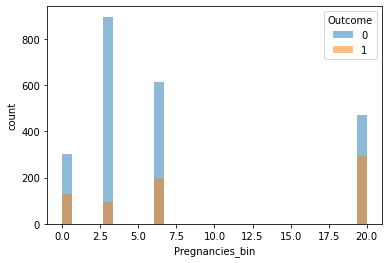

In [158]:
plt.hist(train.loc[train['Outcome'] == 0, 'Pregancies_bin'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'Pregancies_bin'].dropna(),
         bins=30, alpha=0.5, label='1')
plt.xlabel('Pregnancies_bin')
plt.ylabel('count')
plt.legend(title='Outcome')

binningをカテゴリカルデータとしたら

In [159]:
train['Pregancies_bin'] = train['Pregancies_bin'].astype('category')
# train.info()
P_bin = pd.get_dummies(train[['Pregancies_bin']])
train = pd.concat([train,P_bin] , axis=1)
# P_bin
display(train, 30)

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_new,BloodPressure_na,Pregancies_bin,Pregancies_bin_0,Pregancies_bin_3,Pregancies_bin_6,Pregancies_bin_20
0,200,9,125,74,0,0,28.536910,0.444902,45,1,74.0,0,20,0,0,0,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0,80.0,0,6,0,0,1,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0,78.0,0,6,0,0,1,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0,74.0,0,20,0,0,0,1
4,3644,5,107,78,44,284,52.935068,0.284959,45,1,78.0,0,6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4931,4,88,74,17,0,33.848723,0.171073,23,0,74.0,0,6,0,0,1,0
2996,3264,0,144,88,0,0,26.846832,0.259957,21,1,88.0,0,0,1,0,0,0
2997,1653,6,117,96,36,0,28.101646,0.716126,22,1,96.0,0,20,0,0,0,1
2998,2607,2,113,74,0,0,33.079021,0.266179,38,1,74.0,0,3,0,1,0,0


30

妊娠の有無のデータ

In [160]:
train['Pregnancies_new'] = train['Pregnancies'].replace([0], np.nan)
train['Pregnancies_na'] = train['BloodPressure_new'].isnull()*1

妊娠の数は年齢と共に増加（相関高い）
妊娠数・年齢の特徴量作成

In [161]:
train['Pre/age'] = train['Pregnancies'] /train['Age']

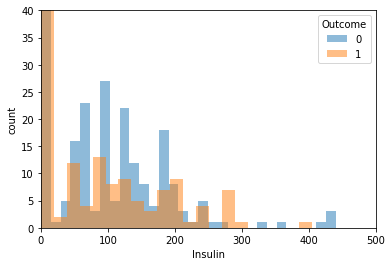

In [162]:
#　インスリン値との関係
plt.hist(train.loc[train['Outcome'] == 0, 'Insulin'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'Insulin'].dropna(),
         bins=30, alpha=0.5, label='1')
plt.axis([0, 500, 0, 40])
plt.xlabel('Insulin')
plt.ylabel('count')
plt.legend(title='Outcome')

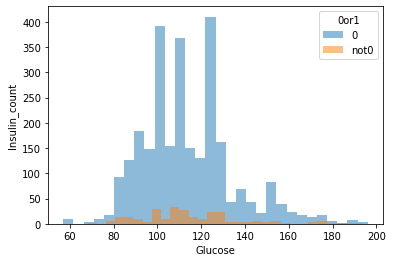

In [163]:
#血糖値とインスリン０の関係
plt.hist(train.loc[train['Insulin'] == 0, 'Glucose'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Insulin'] != 0, 'Glucose'].dropna(),
         bins=30, alpha=0.5, label='not0')
plt.xlabel('Glucose')
plt.ylabel('Insulin_count')
plt.legend(title='0or1')

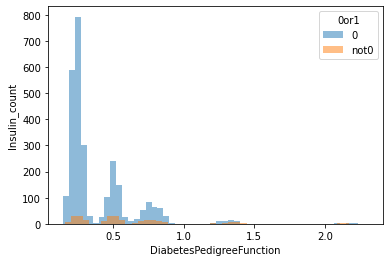

In [164]:
#DiabetesPedigreeFunctionとインスリン０の関係
plt.hist(train.loc[train['Insulin'] == 0, 'DiabetesPedigreeFunction'].dropna(),
         bins=50, alpha=0.5, label='0')
plt.hist(train.loc[train['Insulin'] != 0, 'DiabetesPedigreeFunction'].dropna(),
         bins=50, alpha=0.5, label='not0')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Insulin_count')
plt.legend(title='0or1')

'DiabetesPedigreeFunction'が低い人はラベル０が多い
'DiabetesPedigreeFunction'が高い人は差がない
インスリン値が０は欠損と扱い、'DiabetesPedigreeFunction' 0.4以下の平均で埋める.

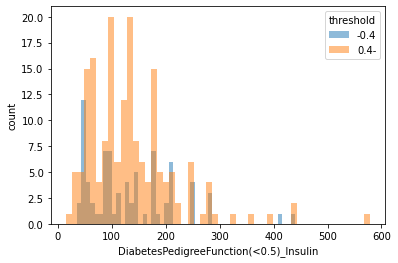

In [165]:
DPF2 = train[(train['DiabetesPedigreeFunction'] < 0.4)  & (train['Insulin'] != 0 )]['Insulin']
DPF8 = train[(train['DiabetesPedigreeFunction'] >= 0.4)  & (train['Insulin'] != 0 )]['Insulin']

plt.hist(DPF2,bins=50, alpha=0.5, label='-0.4')
plt.hist(DPF8,bins=50, alpha=0.5, label='0.4-')
plt.xlabel('DiabetesPedigreeFunction(<0.5)_Insulin')
plt.ylabel('count')
plt.legend(title='threshold')

In [166]:
DPF = train[(train['DiabetesPedigreeFunction'] < 0.4)  & (train['Insulin'] != 0 )]['Insulin'].mean()
DPF

135.63636363636363

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     3000 non-null   int64   
 1   Pregnancies               3000 non-null   int64   
 2   Glucose                   3000 non-null   int64   
 3   BloodPressure             3000 non-null   int64   
 4   SkinThickness             3000 non-null   int64   
 5   Insulin                   3000 non-null   int64   
 6   BMI                       3000 non-null   float64 
 7   DiabetesPedigreeFunction  3000 non-null   float64 
 8   Age                       3000 non-null   int64   
 9   Outcome                   3000 non-null   int64   
 10  BloodPressure_new         2887 non-null   float64 
 11  BloodPressure_na          3000 non-null   int64   
 12  Pregancies_bin            3000 non-null   category
 13  Pregancies_bin_0          3000 non-null   uint8 

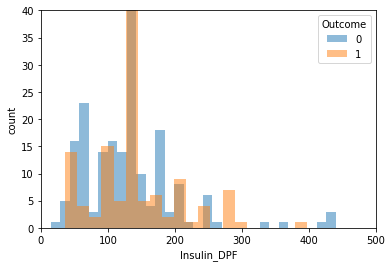

In [167]:
train['Insulin_DPF'] = train['Insulin'].replace([0], np.nan)
train['Insulin_DPF'].fillna(DPF, inplace=True) 
train.info()

plt.hist(train.loc[train['Outcome'] == 0, 'Insulin_DPF'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'Insulin_DPF'].dropna(),
         bins=30, alpha=0.5, label='1')
plt.axis([0, 500, 0, 40])
plt.xlabel('Insulin_DPF')
plt.ylabel('count')
plt.legend(title='Outcome')

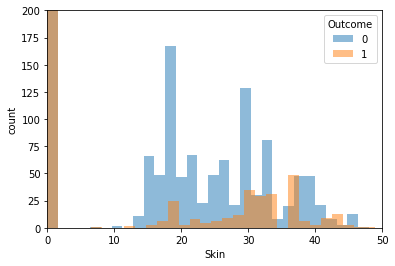

In [168]:
#　皮膚厚との関係
plt.hist(train.loc[train['Outcome'] == 0, 'SkinThickness'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'SkinThickness'].dropna(),
         bins=30, alpha=0.5, label='1')
plt.axis([0, 50, 0, 200])
plt.xlabel('Skin')
plt.ylabel('count')
plt.legend(title='Outcome')

分布に違いはありそう
しかし皮膚厚は分布からみて明らかに０はおかしい,データを取得していないか？
０は平均値で置換

Text(0, 0.5, 'SkinThickness')

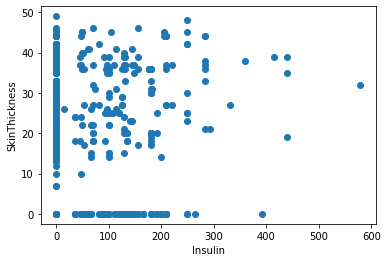

In [169]:
#特に相関が高かったInsulinと皮膚の関係
plt.scatter(train['Insulin'], train['SkinThickness'])
plt.xlabel('Insulin')
plt.ylabel('SkinThickness')

関係性は低いか、、、
やはり平均で置換

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     3000 non-null   int64   
 1   Pregnancies               3000 non-null   int64   
 2   Glucose                   3000 non-null   int64   
 3   BloodPressure             3000 non-null   int64   
 4   SkinThickness             3000 non-null   int64   
 5   Insulin                   3000 non-null   int64   
 6   BMI                       3000 non-null   float64 
 7   DiabetesPedigreeFunction  3000 non-null   float64 
 8   Age                       3000 non-null   int64   
 9   Outcome                   3000 non-null   int64   
 10  BloodPressure_new         2887 non-null   float64 
 11  BloodPressure_na          3000 non-null   int64   
 12  Pregancies_bin            3000 non-null   category
 13  Pregancies_bin_0          3000 non-null   uint8 

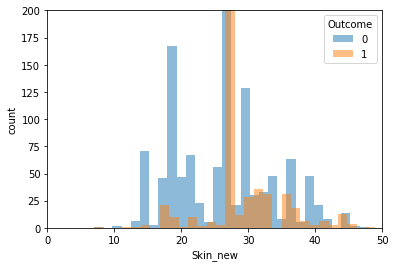

In [170]:
train['SkinThickness_new'] = train['SkinThickness'].replace([0], np.nan)
train['SkinThickness_new'].fillna(train['SkinThickness_new'].mean(), inplace=True) 
train.info()

plt.hist(train.loc[train['Outcome'] == 0, 'SkinThickness_new'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'SkinThickness_new'].dropna(),
         bins=30, alpha=0.5, label='1')
plt.axis([0, 50, 0, 200])
plt.xlabel('Skin_new')
plt.ylabel('count')
plt.legend(title='Outcome')

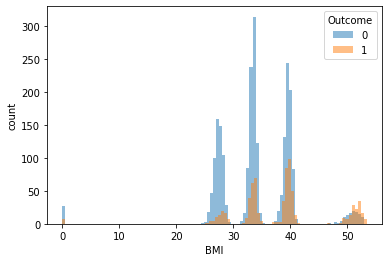

In [171]:
#　BMIとの関係
plt.hist(train.loc[train['Outcome'] == 0, 'BMI'].dropna(),
         bins=100, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'BMI'].dropna(),
         bins=100, alpha=0.5, label='1')
# plt.axis([0, 50, 0, 200])
plt.xlabel('BMI')
plt.ylabel('count')
plt.legend(title='Outcome')

BMIは０でなく０付近に一山ある。この値はおかしい桁間違いか

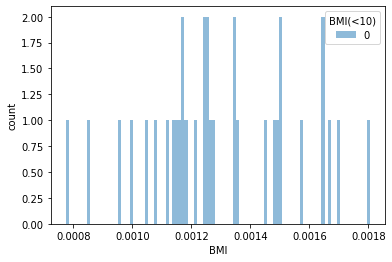

In [172]:
# 10以下で確認
plt.hist(train.loc[train['BMI'] < 10, 'BMI'].dropna(),
         bins=100, alpha=0.5, label='0')
plt.xlabel('BMI')
plt.ylabel('count')
plt.legend(title='BMI(<10)')

In [173]:
def BMI(x):
    if x<1:
        x =  x*10000
        return x
    else :
        return x

In [174]:
train['BMI'] = train['BMI'].apply(BMI)

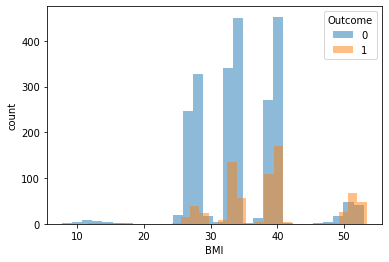

In [175]:
#　桁補正後BMIとの関係
plt.hist(train.loc[train['Outcome'] == 0, 'BMI'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'BMI'].dropna(),
         bins=30, alpha=0.5, label='1')
# plt.axis([0, 50, 0, 200])
plt.xlabel('BMI')
plt.ylabel('count')
plt.legend(title='Outcome')

In [176]:
train['BMI'].describe()

count    3000.000000
mean       35.408959
std         6.990180
min         7.748040
25%        32.301920
50%        33.835873
75%        39.578256
max        53.400629
Name: BMI, dtype: float64

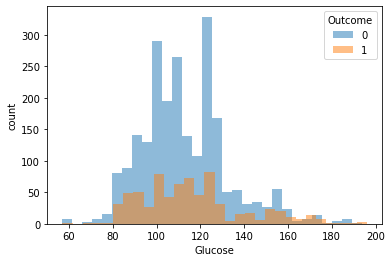

In [177]:
#　Glucoseとの関係
plt.hist(train.loc[train['Outcome'] == 0, 'Glucose'].dropna(),
         bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Outcome'] == 1, 'Glucose'].dropna(),
         bins=30, alpha=0.5, label='1')
# plt.axis([0, 50, 0, 200])
plt.xlabel('Glucose')
plt.ylabel('count')
plt.legend(title='Outcome')

## データの修正項目

・血圧　欠損かどうかの特徴量追加

・インスリン　DiabetesPedigreeFunction'] < 0.4　の平均

・皮膚厚　平均

・妊娠/Age

（・BMI　1以下は1000倍）

In [178]:
#データ読み込み
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample= pd.read_csv("data/sample_submit.csv",header = None)

df = pd.concat([train, test], sort=False)

In [179]:
DPF = train[(train['DiabetesPedigreeFunction'] < 0.4)  & (train['Insulin'] != 0 )]['Insulin'].mean()

In [180]:
df['BloodPressure_0'] = df['BloodPressure'].replace([0], np.nan)
df['SkinThickness_0'] = df['SkinThickness'].replace([0], np.nan)
df['Insulin_0'] = df['Insulin'].replace([0], np.nan)
df['Pregnancies_0'] = train['Pregnancies'].replace([0], np.nan)

df.isnull().sum()

index                          0
Pregnancies                    0
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                     2000
BloodPressure_0              186
SkinThickness_0             2920
Insulin_0                   4582
Pregnancies_0                726
dtype: int64

In [181]:
#追加
df['SkinThickness_na'] = df['SkinThickness_0'].isnull()*1
df['BloodPressure_na'] = df['BloodPressure_0'].isnull()*1
df['Insulin_na'] = df['Insulin_0'].isnull()*1
df['Pregnancies_na'] = df['BloodPressure_0'].isnull()*1
df['Pre/age'] = df['Pregnancies'] / df['Age']

#修正
df['BMI'] = df['BMI'].apply(BMI)

#欠損補完
df['SkinThickness_mean'] = df['SkinThickness_0'].fillna(df['SkinThickness_0'].mean(), inplace=False)
df['BloodPressure_mean'] = df['BloodPressure_0'].fillna(df['BloodPressure_0'].mean(), inplace=False)
df['Insulin_dpf_mean'] = df['Insulin_0'].fillna(DPF, inplace=False)

#離散化
df['Pregnancies_bin'] = pd.cut(df['Pregnancies'],
                                 bins=[0, 0.1, 3, 6, 20],
                                 right=False,
                                 labels=['0','-1','-3','3-'],
                                 duplicates='raise',
                                 include_lowest=True)
P_bin = pd.get_dummies(df[['Pregnancies_bin']])
df = pd.concat([df,P_bin] , axis=1)

# df['Pregnancies_bin_num'] = df['Pregnancies_bin'].astype(np.int64) #カテゴリ変数でなく数値として使える



df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     5000 non-null   int64   
 1   Pregnancies               5000 non-null   int64   
 2   Glucose                   5000 non-null   int64   
 3   BloodPressure             5000 non-null   int64   
 4   SkinThickness             5000 non-null   int64   
 5   Insulin                   5000 non-null   int64   
 6   BMI                       5000 non-null   float64 
 7   DiabetesPedigreeFunction  5000 non-null   float64 
 8   Age                       5000 non-null   int64   
 9   Outcome                   3000 non-null   float64 
 10  BloodPressure_0           4814 non-null   float64 
 11  SkinThickness_0           2080 non-null   float64 
 12  Insulin_0                 418 non-null    float64 
 13  Pregnancies_0             4274 non-null   float6

In [182]:
df['BMI'].describe()

count    5000.000000
mean       35.480025
std         6.968747
min         7.748040
25%        32.453978
50%        33.828671
75%        39.627290
max        53.400629
Name: BMI, dtype: float64

In [183]:
train = df[:len(train)]
test = df[len(train):]

In [184]:
train.to_csv('data_EDA/train.csv', index=False)
test.to_csv('data_EDA/test.csv', index=False)

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     3000 non-null   int64   
 1   Pregnancies               3000 non-null   int64   
 2   Glucose                   3000 non-null   int64   
 3   BloodPressure             3000 non-null   int64   
 4   SkinThickness             3000 non-null   int64   
 5   Insulin                   3000 non-null   int64   
 6   BMI                       3000 non-null   float64 
 7   DiabetesPedigreeFunction  3000 non-null   float64 
 8   Age                       3000 non-null   int64   
 9   Outcome                   3000 non-null   float64 
 10  BloodPressure_0           2887 non-null   float64 
 11  SkinThickness_0           1234 non-null   float64 
 12  Insulin_0                 256 non-null    float64 
 13  Pregnancies_0             2570 non-null   float6

## 欠損処理関数

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample= pd.read_csv("data/sample_submit.csv",header = None)

In [195]:
#データ読み込み
train = pd.read_csv("data_EDA/train.csv")
test = pd.read_csv("data_EDA/test.csv")
X_train = train[['DiabetesPedigreeFunction',
                 'BMI',
                 'Glucose',
                 'Age',
                 'Pregnancies',
                 'Pregnancies_bin'
                ]]
id_train = train[['index']]
y_train = train[['Outcome']]


X_test = test[X_train.columns]
id_test = test[id_train.columns]

In [196]:
# 数値データ
col_num = X_train.columns[X_train.dtypes!='object'].values.tolist()

dict_num = {}
for col in col_num:
    print(col)
    # 欠損値を0へ
    value_fillna = 0 
    X_train[col] = X_train[col].fillna(value_fillna)
    # 正規化
    value_min = X_train[col].min()
    value_max = X_train[col].max()
    value_mean = X_train[col].mean()
    value_std = X_train[col].std()
    X_train[col] = (X_train[col] - value_min) / (value_max - value_min)
    # X_tarin[col] = (X_train[col] - value_mean) / value_std
    
    dict_num[col] = {}
    dict_num[col]['fillna'] = value_fillna
    dict_num[col]['min'] = value_min
    dict_num[col]['max'] = value_max
    dict_num[col]['mean'] = value_max    
    dict_num[col]['std'] = value_max    
    
print('Done')

DiabetesPedigreeFunction
BMI
Glucose
Age
Pregnancies
Done


In [197]:
# カテゴリデータ
# （embedding予定でラベルエンコーダー）
from sklearn.preprocessing import LabelEncoder
col_cat = X_train.columns[X_train.dtypes=='object'].values.tolist()

dict_cat = {}
for col in col_cat:
    print(col)
    value_fillna = 'unknown'
    X_train[col] = X_train[col].fillna(value_fillna)
    
    X_train[col] = X_train[col].astype(str)
    # strに変換
    le = LabelEncoder()
    le.fit(X_train[col])
    list_label = sorted(list(set(le.classes_) | set(['unknown'])))
    map_label = {j:i for i,j in enumerate(list_label)}
    X_train[col] = X_train[col].map(map_label)
    
    dict_cat[col] = {}
    dict_cat[col]['fillna'] = value_fillna
    dict_cat[col]['map_label'] = map_label
    dict_cat[col]['num_label'] = len(list_label)

print('Done')


Pregnancies_bin
Done


In [198]:
def transform_data(input_x):
    output_x = input_x.copy()
    
    for col in col_num:
        value_fillna = dict_num[col]['fillna']
        output_x[col] = output_x[col].fillna(value_fillna)
        
        value_min = dict_num[col]['min']
        value_max = dict_num[col]['max']
        output_x[col]  = (output_x[col] - value_min ) / (value_max - value_min)
        
    for col in col_cat:
        value_fillna = dict_cat[col]['fillna']
        output_x[col] = output_x[col].fillna(value_fillna)
        
        output_x[col] = output_x[col].astype(str)
        
        map_label = dict_cat[col]['map_label']
        output_x[col] = output_x[col].map(map_label)
        
        #対応するものがない場合はunkoumn
        output_x[col] = output_x[col].fillna(map_label['unknown'])
        
    return output_x

X_test = transform_data(X_test)

In [199]:
X_test

,DiabetesPedigreeFunction,BMI,Glucose,Age,Pregnancies,Pregnancies_bin
0,0.313823,0.708574,0.496403,0.000000,0.000000,2
1,0.027125,0.702316,0.223022,0.021739,0.230769,1
2,0.173992,0.557487,0.410072,0.000000,0.230769,1
3,0.166544,0.419302,0.640288,0.369565,0.076923,0
4,0.303618,0.712381,0.474820,0.152174,0.076923,0
...,...,...,...,...,...,...
1995,0.013546,0.693011,0.669065,0.108696,0.307692,1
1996,0.168592,0.676110,0.690647,0.152174,0.461538,3
1997,0.270176,0.962270,0.352518,0.173913,0.538462,3
1998,0.079172,0.712423,0.316547,0.108696,0.153846,0


In [200]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DiabetesPedigreeFunction  3000 non-null   float64
 1   BMI                       3000 non-null   float64
 2   Glucose                   3000 non-null   float64
 3   Age                       3000 non-null   float64
 4   Pregnancies               3000 non-null   float64
 5   Pregnancies_bin           3000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 140.8 KB


In [173]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train['Pregnancies_bin'].values.reshape(-1, 1))
list_ohe_label = sorted(list(set(le.classes_) | set(['unknown'])))
map_ohe_label = {j:i for i,j in enumerate(list_label)}

map_label

{'-1': 0, '-3': 1, '0': 2, '3-': 3, 'unknown': 4}